In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')
df =  pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA

In [11]:
print(df.shape)
df.info()
df.describe()

(32581, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [15]:
print(df.isnull().sum())
df = df.dropna()
df = df[df['person_age'] >= 18]


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [17]:
df.shape

(28638, 12)

In [19]:
print("\nTarget value counts:")
print(df['loan_status'].value_counts())


Target value counts:
loan_status
0    22435
1     6203
Name: count, dtype: int64


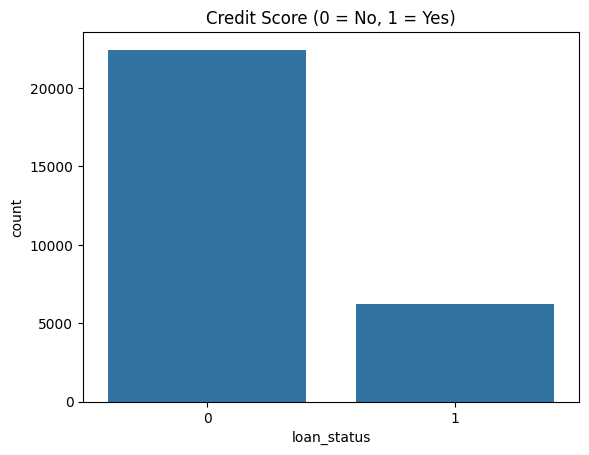

In [18]:
sns.countplot(x='loan_status', data=df)
plt.title("Credit Score (0 = No, 1 = Yes)")
plt.show()

# Encoding

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns

print(cat_cols)

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("After Encoding \n")
print(df.dtypes)


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
After Encoding 

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object


# Split Dataset

In [23]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

**Logistic Regression**

In [36]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [37]:
y_pred_log = log_model.predict(X_test)

In [41]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7831703910614525
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4443
           1       0.51      0.77      0.61      1285

    accuracy                           0.78      5728
   macro avg       0.72      0.78      0.73      5728
weighted avg       0.83      0.78      0.80      5728



**Random Forest**

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [40]:
y_pred_rf = rf_model.predict(X_test)

In [42]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9292946927374302
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4443
           1       0.98      0.70      0.82      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.85      0.89      5728
weighted avg       0.93      0.93      0.92      5728



# Comparison

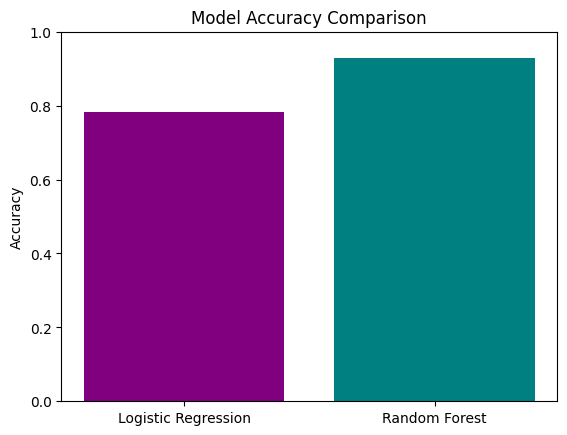

In [43]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
accuracy = [0.783, 0.929]
plt.bar(models, accuracy, color=['purple', 'teal'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()


# Feature Importance

🔹 Top 10 Most Important Features:

                       Feature  Importance
8          loan_percent_income    0.203629
1                person_income    0.159750
7                loan_int_rate    0.135547
5                   loan_grade    0.127131
6                    loan_amnt    0.083370
2        person_home_ownership    0.069421
4                  loan_intent    0.064133
3            person_emp_length    0.055889
0                   person_age    0.048523
10  cb_person_cred_hist_length    0.038445


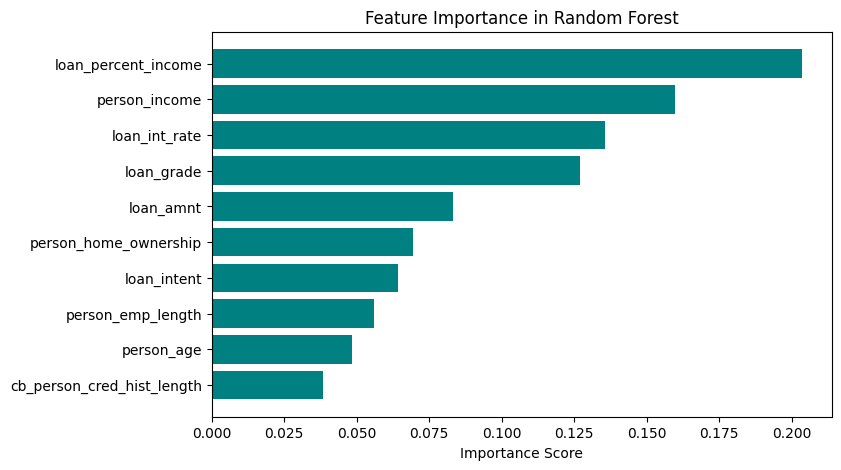

In [44]:
importances = rf_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("🔹 Top 10 Most Important Features:\n")
print(feature_importance.head(10))

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10], color='teal')
plt.gca().invert_yaxis()
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.show()
